In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
movie = pd.read_csv (r'C:\Users\Estu Widi Andriani\Documents\Phyton Cource\estulatihan\movies_metadata.csv')
movie.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [5]:
movie['id'] = pd.to_numeric(movie['id'], errors='coerce')
movie.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [6]:
movie_rename = movie.rename(index=float, columns={"id": "tmdbId"})
movie_rename.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
movie_loc = movie_rename.loc[:,["title","tmdbId"]]
movie_loc.head(5)

,title,tmdbId
0.0,Toy Story,862.0
1.0,Jumanji,8844.0
2.0,Grumpier Old Men,15602.0
3.0,Waiting to Exhale,31357.0
4.0,Father of the Bride Part II,11862.0


In [8]:
link = pd.read_csv(r"C:\Users\Estu Widi Andriani\Documents\Phyton Cource\estulatihan\links.csv")
link.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [10]:
link_loc = link.loc[:,["movieId","tmdbId"]]
link_loc.head(5)

,movieId,tmdbId
0,1,862.0
1,2,8844.0
2,3,15602.0
3,4,31357.0
4,5,11862.0


In [11]:
data1 = pd.merge(movie_loc,link_loc)
data1.head(5)

,title,tmdbId,movieId
0,Toy Story,862.0,1
1,Jumanji,8844.0,2
2,Grumpier Old Men,15602.0,3
3,Waiting to Exhale,31357.0,4
4,Father of the Bride Part II,11862.0,5


In [12]:
rating = pd.read_csv(r"C:\Users\Estu Widi Andriani\Documents\Phyton Cource\estulatihan\ratings.csv")
rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [13]:
data2 = pd.merge(data1,rating)
pd.DataFrame(data2.head(5))

,title,tmdbId,movieId,userId,rating,timestamp
0,Toy Story,862.0,1,8,4.0,1013443596
1,Toy Story,862.0,1,9,4.5,1073837180
2,Toy Story,862.0,1,12,4.0,943912205
3,Toy Story,862.0,1,20,4.0,1368361348
4,Toy Story,862.0,1,24,4.0,979869938


In [14]:
data2.shape

(26031604, 6)

In [15]:
data3 = data2.iloc[:1000000,:]
data3.shape

(1000000, 6)

In [16]:
pivot_table = data3.pivot_table(values='rating', index=['userId'],columns=['title'], aggfunc=np.sum, fill_value=0)
pivot_table.head(100)

title,A Midwinter's Tale,Ace Ventura: When Nature Calls,Across the Sea of Time,Angels and Insects,Antonia's Line,Assassins,Babe,Balto,Beautiful Girls,Bed of Roses,...,Toy Story,Twelve Monkeys,Two Bits,Two If by Sea,Unforgettable,Vampire in Brooklyn,Waiting to Exhale,When Night Is Falling,White Squall,Wings of Courage
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
movie_watched = pivot_table["Vampire in Brooklyn"] 
similarity_with_other_movies = pivot_table.corrwith(movie_watched)
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
result = similarity_with_other_movies.head()
print (result.head())

title
Vampire in Brooklyn    1.000000
Money Train            0.242142
Cutthroat Island       0.223210
Assassins              0.213783
Mortal Kombat          0.187106
dtype: float64


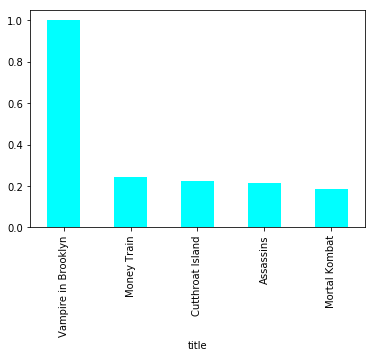

In [22]:
result.plot(kind='bar',colormap='cool')